In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [3]:
df = pd.read_csv('./prelim master_Aug 5.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,28,49,69,70,71,72,73,74,75,88,99,101,131,136,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.columns

Index(['Unnamed: 0', 'timestamp_from', 'timestamp_to', 'device_id',
       'accelerometer.accuracy', 'accelerometer.double_values_0',
       'accelerometer.double_values_1', 'accelerometer.double_values_2',
       'accelerometer.values_considered', 'battery.battery_adaptor',
       ...
       'sensor_wifi.ssid', 'sensor_wifi.values_considered',
       'significant.is_moving', 'significant.values_considered', 'wifi.bssid',
       'wifi.frequency', 'wifi.rssi', 'wifi.security', 'wifi.ssid',
       'wifi.values_considered'],
      dtype='object', length=142)

In [4]:
df.shape

(71130, 142)

In [25]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
csv_folder = './tables/'
files = list(os.listdir(csv_folder))

table_names = []
for f in files:
    table_names.append( f.replace('.csv', '') )
table_names.sort()
table_names

['accelerometer',
 'battery',
 'battery_charges',
 'battery_discharges',
 'calls',
 'gyroscope',
 'linear_accelerometer',
 'locations',
 'locations_visit',
 'plugin_ambient_noise',
 'plugin_device_usage',
 'plugin_google_activity_recognition',
 'plugin_ios_activity_recognition',
 'plugin_openweather',
 'plugin_studentlife_audio',
 'plugin_studentlife_audio_android',
 'proximity',
 'rotation',
 'screen',
 'sensor_wifi',
 'significant',
 'wifi']

In [27]:
df.shape

(71130, 141)

In [28]:
device_ids = df['device_id'].value_counts()
device_ids

d8e061cb-282b-43f2-854e-9ae3c927f220    21073
51397770-d216-4391-ab33-243fb24bb81e    12375
4d6a0382-238d-4bd4-84ee-d88cc35a5f3d    10253
99a86843-82f2-43af-844a-978669900d19     7033
acc0b042-1b33-4857-bceb-7ddbdc9394ce     6465
5b2c4ac8-eea6-4f17-850f-0a7f10acee2f     4443
baf0ca22-ca12-4ebd-8378-20189109324f     4083
903be8ed-91d3-455a-a64b-1964e2d66e1b     3954
6489598a-b088-46f7-ae6e-d2dfb0c67ea5      762
fbd51491-a197-47c6-9c11-a3bf84705ff5      304
a6a7d8dc-c72c-4111-9935-a834a25fbaa6      116
91b15bd0-965d-44f7-aa2a-169214e1b28c      104
2d6133af-c77d-42e2-bacd-3d15e0f3a222       73
e4b4a4bf-3ca0-49df-8c29-1c655ba1d0fb       38
f4ca68e5-2413-445d-ba0c-9457f4a1b362       32
a65e4b1a-6f58-40d4-ac2f-bb2723954ab7       10
0ad5831b-e34a-42bc-b649-a8f8d60aa096        9
a8c008a0-0617-456a-b29e-a091555a889a        3
Name: device_id, dtype: int64

In [14]:
# _id = '2d6133af-c77d-42e2-bacd-3d15e0f3a222'
# df_id = df[ df['device_id']==_id ]
# df_id

In [15]:
# c = 'accelerometer.values_considered'
# x = df_id['timestamp_from']
# y = df_id[c]
# plt.plot(x, y)
# # plt.xticks(np.arange( np.datetime64(x.iloc[0]), np.datetime64(x.iloc[-1]), timedelta(minutes=1)).astype(datetime))
# plt.gcf().set_size_inches(40, 5);

In [16]:
import matplotlib.dates as mdates

colors = ['firebrick', 'red', 'darksalmon', 'sienna', 'tan', 'gold',
          'chartreuse', 'darkgreen', 'lightseagreen', 'slategray',
          'royalblue', 'navy', 'blue', 'plum', 'm', 'orange', 'coral',
          'lemonchiffon', 'skyblue', 'c', 'aqua', 'blueviolet', 'fuchsia']

In [17]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

In [18]:
def get_data(_id, tname):
    global df
    df_id = df[ df['device_id']==_id ]
    x = df_id['timestamp_from'].apply(lambda x: np.datetime64(x))
#     _nc = 0
#     for tname in table_names:
    c = tname+'.values_considered'
    y = df_id[c]
#     plt.plot(x, y, label=tname, c=colors[_nc])
#     _nc += 1
    return (x,y,c)

In [19]:
def fig_format(fig, ax, title):
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))   #to get a tick every 15 minutes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))     #optional formatting 
    fig.autofmt_xdate()
    fig.set_size_inches(40, 5)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1));
    plt.draw()

In [ ]:
outpath = "./Exploration of frequencies/"

fig, ax = plt.subplots()        # generate figure with axes

# initalize first one
i = 0
tname = table_names[i]
x, y, c = get_data(device_ids[i], tname)
image, = ax.plot(x,y, label=tname, c=colors[i])     # initialize plot
fig_format(fig, ax, 'Table Recordings for device: '+str(_id) )
fig.savefig(path.join(outpath,"dataname_0.png")

for i in range(1, len(device_ids)):
    tname = table_names[i]
    image.set_data(x,data[i])
    plt.draw()
    fig.savefig(path.join(outpath,"dataname_{0}.png".format(i))

In [ ]:
for _id in device_ids:
    df_id = df[ df['device_id']==_id ]
    x = df_id['timestamp_from'].apply(lambda x: np.datetime64(x))
    _nc = 0
    for tname in table_names:
        c = tname+'.values_considered'
        y = df_id[c]
        plt.plot(x, y, label=tname, c=colors[_nc])
        _nc += 1
    fig = plt.gcf()
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))   #to get a tick every 15 minutes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))     #optional formatting 
    fig.autofmt_xdate()
    fig.set_size_inches(40, 5)
    plt.title('Table Recordings for device: '+str(_id))
    plt.legend(bbox_to_anchor=(1, 1));

# Plot the frequencies of all the features for a single device_id

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


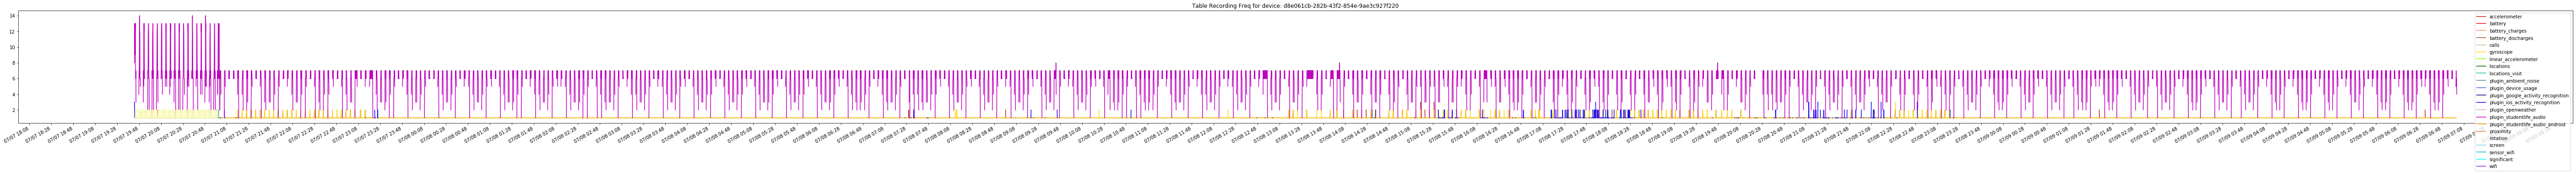

In [20]:
_id = 'd8e061cb-282b-43f2-854e-9ae3c927f220'
df_id = df[ df['device_id']==_id ]

x = df_id['timestamp_from'].apply(lambda x: np.datetime64(x))

_nc = 0
for tname in table_names:
    c = tname+'.values_considered'
    y = df_id[c]
    plt.plot(x, y, label=tname, c=colors[_nc])
    _nc += 1

fig = plt.gcf()
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=20))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))     #optional formatting 
fig.autofmt_xdate()
fig.set_size_inches(100, 5)
plt.title('Table Recording Freq for device: '+str(_id))
plt.legend(bbox_to_anchor=(1, 1));

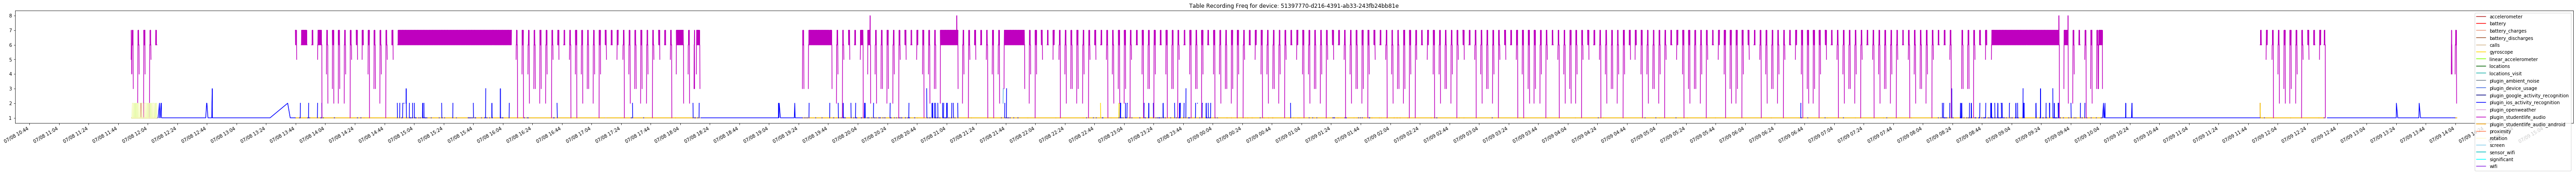

In [21]:
_id = '51397770-d216-4391-ab33-243fb24bb81e'
df_id = df[ df['device_id']==_id ]

x = df_id['timestamp_from'].apply(lambda x: np.datetime64(x))

_nc = 0
for tname in table_names:
    c = tname+'.values_considered'
    y = df_id[c]
    plt.plot(x, y, label=tname, c=colors[_nc])
    _nc += 1

fig = plt.gcf()
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=20))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))     #optional formatting 
fig.autofmt_xdate()
fig.set_size_inches(100, 5)
plt.title('Table Recording Freq for device: '+str(_id))
plt.legend(bbox_to_anchor=(1, 1));

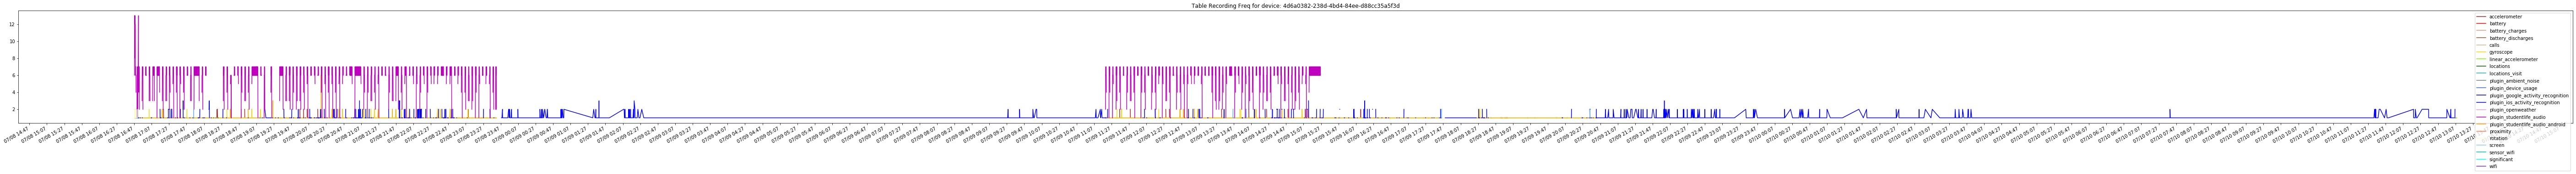

In [22]:
_id = '4d6a0382-238d-4bd4-84ee-d88cc35a5f3d'
df_id = df[ df['device_id']==_id ]

x = df_id['timestamp_from'].apply(lambda x: np.datetime64(x))

_nc = 0
for tname in table_names:
    c = tname+'.values_considered'
    y = df_id[c]
    plt.plot(x, y, label=tname, c=colors[_nc])
    _nc += 1

fig = plt.gcf()
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=20))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))     #optional formatting 
fig.autofmt_xdate()
fig.set_size_inches(100, 5)
plt.title('Table Recording Freq for device: '+str(_id))
plt.legend(bbox_to_anchor=(1, 1));